# Testing

## Errors in Software

Cost of failure 2017:

- US$1.7 trillion in financial losses
- 3.6 billion people affected

Some software errors have caused considerable material and human damage.

Watch the following video, Top Ten Most Disastrous Software Bugs:
https://www.youtube.com/watch?v=AGI371ht1N8

How can we avoid bugs?

**Is it possible to build software without errors?**
- No software is ever 100% bug-free.
- Building software is an ongoing
process.
- Normal day for any developer is:
    1. Write code for one hour.
    2. Spend the rest of the day to fix it.

**Type of Errors**
- Syntax Errors (easy to fix)
- Run Time errors (bugs): (only show after running the program.)

**Run Time Errors**
- Logic errors (mistake in software flow)
- Calculation errors
- Unit-level bugs 
- System-level integration bugs (two or more pieces of software from separate subsystems interact erroneously.)

**Software Testing**

Pro|Cons
---|----
Bugs will often be found before the software is released. | It takes extra time to test the software.

You can either manually or automatically test yous software. 

## Automated Tests**

What are the advantages and disadvantages?

Pro|Cons
---|----
Run quickly by a computer. |The testing scripts have to be written.
Fantastic return on investment. |
Write them once, then run them many, many times. |   The test code has to be maintained.
Help you to maintain your application|
Test can help other developers to understand the program, thus can act as a kind of documentation.| You have to be precise when you write the test scripts


# TDD (Test Driven Development)


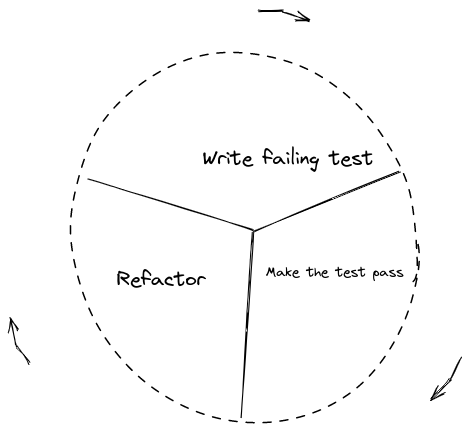

### Unit Test
- Test for single unit (function, method)


In [61]:
#test.py 
#1. Make the test fail

WATER_HOURS = [8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]

def main():
    test_failed = False
    cat_controller = CatController()

    # Test that water is only given each hour 8-11 and 13-19.
    for hour in range(0, 23):
        if hour in WATER_HOURS:
            if not "Give water." in cat_controller.hourly_run(hour):
                test_failed = True
        elif "Give water." in cat_controller.hourly_run(hour):
            test_failed = True

    # Test that cat cage is opened at 7:
    if not "Open cat cage." in cat_controller.hourly_run(7):
        test_failed = True
    return "All tests ran successfully." if test_failed else 'Test failed'
#main()

In [60]:
#2. Make the test pass
class CatController:

    def hourly_run(self, time):
        if time == 7:
            return "Open cat cage."
        elif time == 8:
            return "Give water."
        elif time == 12:
            return ""
        elif time == 17:
            return "Give water."
        elif time == 20:
            return "Close cat cage."
        elif time > 7 and time < 20:
            return "Give water."
        else:
            return "Let sleep."

In [59]:
WATER_HOURS = [8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]

def main():
    test_failed = False
    cat_controller = CatController()

    # Test that water is only given each hour 8-11 and 13-19.
    for hour in range(0, 23):
        if hour in WATER_HOURS:
            if not "Give water." in cat_controller.hourly_run(hour):
                test_failed = "Error water hours"
        elif "Give water." in cat_controller.hourly_run(hour):
            test_failed = "water outside water hours"

    # Test that cat cage is opened at 7:
    # print( not "Open cat cage." in cat_controller.hourly_run(7))
    if not "Open cat cage." in cat_controller.hourly_run(7):
        print(cat_controller.hourly_run(7))
        test_failed = 'cage should be open'
    return "All tests ran successfully." if not test_failed else test_failed
main()


'All tests ran successfully.'

### Unit test framework

- to write more robust test we can also use the Python unit testing framework

In testing following terminology is used:
- Test Fixtures: 
- Test cases
- Test suite
- Test runner

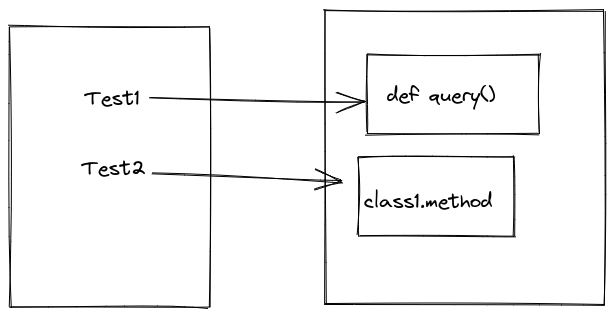

#### Fixtures

In unit testing, you'll often need to execute a set of common instructions before and after running a test.
These instructions could be resembled by objects that represents the configuration state of your app.
These components are known as *fixtures* and are set up before a test and cleaned up after the test has finished. 

#### Test Case

is the individual unit of testing. It checks for a specific response to a particular set of inputs.
A test case basically an assertion of the expected result of a function and the actual result.

#### Test suite

With a growing amount of test cases, the need for categorizing them increases as well.
Test suites are collections of test cases. 


#### Test runner
is a component which orchestrates the execution of tests and provides
the outcome to the user. 

The three most popular test runners are:
- unittest
- pytest
- nose2 


In [63]:
class Dollar:
    pass

In [66]:
import unittest #this package is needed for the TestCase superclass

class TestMoney(unittest.TestCase):
    def testMultiplication(self):
        five = Dollar(5)
        tenner = five.times(2)
        self.assertEqual(10, tenner.amount)

#unittest.main()

### Asserts

<table>
<thead>
<tr><th>Method</th><th>Checks that</th></tr>
</thead>
<tbody>
<tr><td><code><a href="https://www.pythontutorial.net/python-unit-testing/python-assertequal/">assertEqual(x,&nbsp;y, msg=None)</a></code></td>
<td><code>x&nbsp;==&nbsp;y</code></td></tr><tr><td><code><a href="https://www.pythontutorial.net/python-unit-testing/python-assertequal/">assertNotEqual(x,y,msg=None)</a></code></td><td><code>x&nbsp;!=&nbsp;y</code></td></tr>
<tr><td><code><a href="https://www.pythontutorial.net/python-unit-testing/python-asserttrue/">assertTrue(x, msg=None)</a></code></td><td><code>bool(x)&nbsp;is&nbsp;True</code></td></tr>
<tr><td><code><a href="https://www.pythontutorial.net/python-unit-testing/python-asserttrue/">assertFalse(x, msg=None)</a></code></td><td><code>bool(x)&nbsp;is&nbsp;False</code></td></tr>
</tbody></table>


Method|Checks that
---|---
assertIn(x, y, msg=None)| x in y
fail(msg=None)|forces test to Fail
pass | forces the test to pass
assertRaise(Error)|checks if error is raised

- assertRaise can only be run inside a with statement

### Run test runner

- python3 -m unittest -v  (looks for files starting with 'test_')
- python3 -m unittest -v  test_assertions.py (runs test file)
- python3 -m unittest -v  test_assertions (runs module)
- python3 -m unittest -v  test_assertions.TestMethods (runs test class)
- python3 -m unittest -v  test_assertions.TestMethods.test_method1 (runs test method)

### Run coverage
- coverage run -m unittest
- coverage report -m

## Context Managers and with Blocks

- Context Managers exists to control a with statement, just like iterators exists to control a for statement

classes of context manager instances have two methods:
- __ enter__
- __ exit__

In [5]:
class MyContext:
    def __enter__(self):
        print('entering context')
        return 'BLA'
    def __exit__(self, exc_type, exc_value, traceback):
        print('exiting context')
        print('exc_type:', exc_type)
        print('exc_value:', exc_value)
        # print('traceback:', traceback.tb_frame)
        # print('traceback:', traceback.tb_lineno)
        if exc_type is ValueError:
            print(id(exc_type))
            print(id(ValueError))
            print('ValueError')
            return True


with MyContext() as value:
    raise ValueError('Whatever')


print(value)


entering context
exiting context
exc_type: <class 'ValueError'>
exc_value: Whatever
9846784
9846784
ValueError
BLA


- Python calls __ exit__ with None, None, None if all went well; if an exception is raised, the three arguments get the exception data.
- if __ exit__ returns True it tells the interpreter the exception was handled
- if __ exit__ returns a falsy value, any exception raised in the with block will be propagated.

In [ ]:
import unittest

def func_to_test():
    raise TypeError

class TestMethod(unittest.TestCase):
    def test_method(self):
        with self.assertRaises(TypeError):
            func_to_test()


In [49]:
class MyAssertionRaisesContext:
    def __init__(self, error):
        self.error = error
        self.test_result = {'failed': False}

    def __enter__(self):
        print("Entering context")
        return self.test_result

    def __exit__(self, exc_type, exc_value, traceback):
        print("Exiting context")
        print(f"Error: {self.error}")
        if exc_type is self.error:
            print("Caught error")
            print(exc_value)
            return True
        else:
            self.test_result['failed'] = True

def func_to_test(text):
    if type(text) is not str:
        raise TypeError("Wrong type")
    else:
        return text.upper() 

with MyAssertionRaisesContext(TypeError) as result:
    func_to_test(1)
print(result)


Entering context
Exiting context
Error: <class 'TypeError'>
Caught error
Wrong type
{'failed': False}


In [47]:
manager = MyAssertionRaisesContext(TypeError)
manager.__enter__()
try:
    func_to_test(1)
    manager.__exit__(None,None,None)
except Exception as error:
    manager.__exit__(type(error),error,None)


Entering context
Exiting context
Error: <class 'TypeError'>
Caught error
Wrong type


### Errors in Python

<table class="table table-bordered ">
                <thead>
                    <tr>
                        <th>
                            Exception
                        </th>
                        <th>
                            Description
                        </th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>
                            AssertionError
                        </td>
                        <td>
                            Raised when the assert statement fails.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            AttributeError
                        </td>
                        <td>
                            Raised on the attribute assignment or reference fails.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            EOFError
                        </td>
                        <td>
                            Raised when the input() function hits the end-of-file condition.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            ImportError
                        </td>
                        <td>
                            Raised when the imported module is not found.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            IndexError
                        </td>
                        <td>
                            Raised when the index of a sequence is out of range.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            KeyError
                        </td>
                        <td>
                            Raised when a key is not found in a dictionary.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            KeyboardInterrupt
                        </td>
                        <td>
                            Raised when the user hits the interrupt key (Ctrl+c or delete).
                        </td>
                    </tr>
                    <tr>
                        <td>
                            NameError
                        </td>
                        <td>
                            Raised when a variable is not found in the local or global scope.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            NotImplementedError
                        </td>
                        <td>
                            Raised by abstract methods.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            RuntimeError
                        </td>
                        <td>
                            Raised when an error does not fall under any other category.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            StopIteration
                        </td>
                        <td>
                            Raised by the next() function to indicate that there is no further item to be returned by the iterator.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            SyntaxError
                        </td>
                        <td>
                            Raised by the parser when a syntax error is encountered.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            IndentationError
                        </td>
                        <td>
                            Raised when there is an incorrect indentation.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            SystemError
                        </td>
                        <td>
                            Raised when the interpreter detects internal error.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            SystemExit
                        </td>
                        <td>
                            Raised by the sys.exit() function.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            TypeError
                        </td>
                        <td>
                            Raised when a function or operation is applied to an object of an incorrect type.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            UnboundLocalError
                        </td>
                        <td>
                            Raised when a reference is made to a local variable in a function or method, but no value has been bound to that variable.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            ValueError
                        </td>
                        <td>
                            Raised when a function gets an argument of correct type but improper value.
                        </td>
                    </tr>
                    <tr>
                        <td>
                            ZeroDivisionError
                        </td>
                        <td>
                            Raised when the second operand of a division or module operation is zero.
                        </td>
                    </tr>
                </tbody>
            </table>

**UnboundLocalError**

In [32]:
def wrapper():
    a = 1
    def inner():
        nonlocal a
        a +=1
        print(a)
    return inner

b = 1
def func():
    # global b
    b +=1
    print(b)

wrapper()()
func()

2


UnboundLocalError: local variable 'b' referenced before assignment

**Assertion Error**


In [36]:
assert True

falsy = ''

assert falsy

AssertionError: 

### Pytest

pytest makes testing easier.

Simple test with pytest:

In [104]:
#RUN tests/test_simple.py from terminal
def test_true():
    assert True

#test_true()

- A test fails as soon as an AssertionError exception is raised.
- an AssertionError is raised when *assert* is followd by a falsy value
- other raised exceptions the test also errors out


In [107]:
def test_key():
    a = ['a','b']
    b = ['b']
    assert a == a 

test_key()

The test result tells us exactly how a and b are different.

With pytest there is not need to memorize the many different assertions that unittest provides.

### Skipping Test

```
@pytest.mark.skip('Do not run this')


@pytest.mark.skipif(True, reason='Do not run this')
```

### Running particular Tests

- pytest -v test_pytest.py -m bla_test
- pytest -v test_pytest.py -m 'not bla_test'

### Running Parametrized Test



In [ ]:
@pytest.mark.parametrize('input,expected', [(1,1), (2,2)])
def test_method2(test_input, expected):
    assert test_input == expected

In [ ]:
import pytest

from app import squared

# TODO: add tests below to be run by pytest.
parameters = [
    (1, 1),
    (10, 20),
    ]
@pytest.mark.parametrize("i,v", parameters)
def test_squared_of_range(i,v):
    assert squared(i) == v


### Bonus
- Refactor Exercise 5: test the square function with different input values with the help of @pytest.mark.parametrize

### Coverage with pytest

- coverage run -m pytest test_pytest_money.py
- coverage report -m

### Integration Test

- After unit test
- Determine if independently developed units of software work correctly when they are connected to each other
- for example a function(Unit1) calls a database(Unit2)


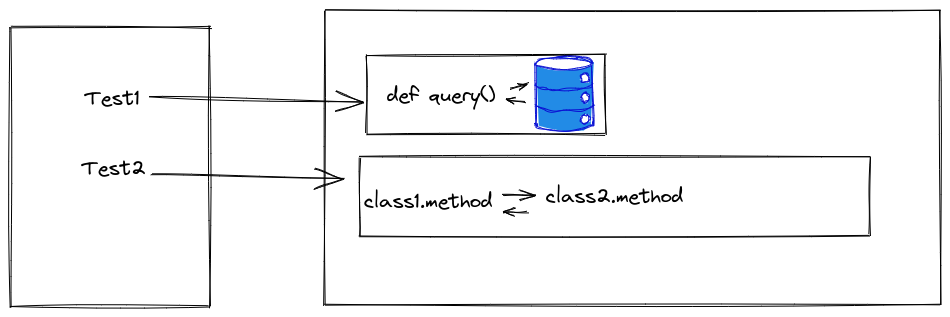

## Mocking:

A mock is a simulation of the object in the code that is being tested. It is simulated to allow
running tests against the object without incurring in unwanted side effects.


Suppose you want to test a function which deletes specific files:
- see MOCK_live folder

In [ ]:
#./MOCK_live/remove.py
import os

def rm(filename):
    os.remove(filename)


In [ ]:
./MOCK_live/test_remove.py
import unittest
import os
from delete import rm

#WITHOUT MOCK
class RmTestCase(unittest.TestCase):
    def test_rm(self):
        # create a file
        open('somefile.txt', 'a')
        # try to delete it
        rm('somefile.txt')
        # check file if still exist
        self.assertFalse(os.path.isfile('./somefile.txt'), 'failed to remove the file')

if __name__ == '__main__':
    # unittest.main()
    pass

Problems:
- test creates and deletes somefile.txt
- might accidentally delete files 

### Mocking with decorator (Version 1)

In [ ]:
from delete import rm
from unittest import mock
import unittest
#WITH MOCK
class RmTestCase(unittest.TestCase):

    @mock.patch('delete.os') #!!!!!
    def test_rm(self, mock_os):
        rm('somefile.txt')
        mock_os.remove.assert_called_with("somefile.txt")

if __name__ == '__main__':
    unittest.main()

At runtime, the *rename* module has its own os which is imported into its own local scope in the module. Thus, if we mock os, we won’t see the effects of the mock in the *rename* module.

## Mocking with context manager Version2

In [ ]:
from unittest import mock
import unittest
from delete import rm
import os


class RmTestCase(unittest.TestCase):

    def test_rm(self):
        with mock.patch('delete.os') as mock_os:
            print(rm('somefile.txt'))
            mock_os.remove.assert_called_with('somefile.txt')




### Mocking without Test Class (Version 3)

In [ ]:

from delete import rm
from unittest import mock

@mock.patch('delete.os')
def test_rm(mock_os):
    rm('foo')
    rm('foo')
    assert mock_os.remove.call_count == 2
    mock_os.remove.assert_called_with('foo')

### Quiz

#### Recap Mocking
- see ./MOCK3_live

### Video
#### Requests
- https://www.youtube.com/watch?v=xT4SV7AH3G8&t=225s&ab_channel=RedEyedCoderClub
please watch from 3:30 until 7:05 

- What is a get request ?
- What is the problem when testing a function which depends upon a get request?
- What attributes has an instance of an request.get? Name at least 3 attributes
- What is the first argument of an get Request? 

##### Mock Requests
- https://www.youtube.com/watch?v=xT4SV7AH3G8&t=225s&ab_channel=RedEyedCoderClub
please watch from 7:05 until the end

#### Video code (slightly changed)
- see REQUEST/video

#

### Controlled Tests using Mocking

- mocking objects are simulated object that mimic the behavior of real application objects in a particular and controlled way
- you can replace objects with mock objects to isolate the behavior of your focus object (you want to test) and create an environment for testing your code
- you already saw the use case for mock: mocking the os module

Another use case is in writing a HTTP Client, since it is likely impossible to spawn the HTTP server and test it through all scenarios to return every possible value.
- HTTP clients are especially difficult to test for all failure scenarios.

- any attribute access on a mock.Mock object is dynamically created t runtime.
- any value can be set to such an attribute

In [52]:
from unittest import mock
m = mock.Mock()
m.some_attribute = "Hello world"
m.some_attribute

'Hello world'

- you can also dynamically create a method on a mock object

In [57]:
from unittest import mock
m = mock.Mock()
m.some_method.return_value = 42
m.some_method()


42

In [58]:
m.some_method('bla')

42

dynamically created methods can also have intentional side effects

In [59]:
from unittest import mock
m = mock.Mock()

def print_hello():
    print("hello world")
    return 43

m.some_method.side_effect = print_hello
m.some_method()

hello world


43

In [60]:
m.some_method.call_count

1

- the *call_count* is a simple way o checking the number of times a method has been called. 

In [62]:
from unittest import mock
m = mock.Mock()

m.some_method('foo', 'bar')
m.some_method.assert_called_once_with('foo', 'bar')
m.some_method.assert_called_once_with('foo', mock.ANY)

- you need to pass the values that you expect callers to use when calling your mock method
- if you don't know what arguments may be passed, you can use **mock.ANY** as a value.